## Problem 15
### In order to solve this set of questions you will use the dataset in the relative directory ./Datasets/tmdb_5000_movies.csv


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Open Your CSV file and print the first 10 rows in a good format ###

In [4]:
dataset = pd.read_csv('./Datasets/tmdb_5000_movies.csv')
dataset.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [48]:
nan_values = dataset. isna()
nan_columns = nan_values. any()
nan_list = dataset.columns[nan_columns].tolist()

In [6]:
nan_list

['homepage', 'overview', 'release_date', 'runtime', 'tagline']

In [23]:
print(dataset['homepage'].dtypes)
print(dataset['overview'].dtypes)
print(dataset['release_date'].dtypes)
print(dataset['runtime'].dtypes)
print(dataset['tagline'].dtypes)

object
object
object
float64
object


##### Exploring data

<AxesSubplot:xlabel='runtime'>

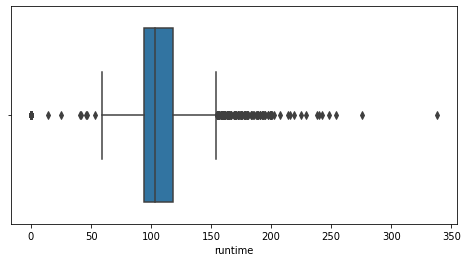

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(dataset['runtime'])

NOTE: As we can see the only numerical column with nan values has an outlier. so I cannot use mean

### Check if any NANs in your dataset and fill them with a good filer ###

In [25]:
if dataset.isnull().values.any():
    dataset = dataset.apply(lambda df: df.fillna(df.value_counts().index[0])) # fill with the most frequent item
    # or just use the mode function
    #dataset = dataset.fillna(dataset.mode())

In [26]:
"""
We can fill the datasets by many ways. depending on the way we see the data. the filling method always depend on the 
understanding of the columns variables
"""
# mean is not always the best solution, if there is any outliers, it will be misleading. 
#more suitable with symmetric data distribution
"""dataset.fillna(dataset.mean(), inplace = True) """

# median is a good solution with skewed data. but since we have categoricals variables I cannot use it
"""dataset.fillna(dataset.median(), inplace = True)"""

# also we can use linear interpolation to fill the nan data,
# in this code snippet it will change the nan with the most suitable number, to follow the direction of increasing.
"""dataset.interpolate(method ='linear', limit_direction ='forward')"""

"dataset.interpolate(method ='linear', limit_direction ='forward')"

In [27]:
dataset.isnull().values.any()

False

### Discover the types of each columns and modify them if needed ###

In [28]:
pd.DataFrame([dataset.dtypes])
#I see that there is no need to change any column type as the numeric is numeric and 
#categorical will always displayed as object

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,int64,object,object,int64,object,object,object,object,float64,object,object,object,int64,float64,object,object,object,object,float64,int64


### Give a very simple statistical analsys for the numerical columns ###

In [46]:
dataset.describe().round()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.0,4803.0,4803.0,4.803000e+03,4801.0,4803.0,4803.0
mean,29045040.0,57165.0,21.0,8.226064e+07,107.0,6.0,690.0
std,40722391.0,88695.0,32.0,1.628571e+08,23.0,1.0,1235.0
min,0.0,5.0,0.0,0.000000e+00,0.0,0.0,0.0
25%,790000.0,9014.0,5.0,0.000000e+00,94.0,6.0,54.0
50%,15000000.0,14629.0,13.0,1.917000e+07,103.0,6.0,235.0
75%,40000000.0,58610.0,28.0,9.291719e+07,118.0,7.0,737.0
max,380000000.0,459488.0,876.0,2.787965e+09,338.0,10.0,13752.0


In [14]:
num_cols = dataset._get_numeric_data().columns # get the numeric columns
dataset[num_cols].describe().apply(lambda s: s.apply('{0:.5f}'.format)) # describe with removing the e notation


,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.00000,4803.00000,4803.00000,4803.00000,4801.00000,4803.00000,4803.00000
mean,29045039.87529,57165.48428,21.49230,82260638.65168,106.87586,6.09217,690.21799
std,40722391.25855,88694.61403,31.81665,162857100.94283,22.61193,1.19461,1234.58589
min,0.00000,5.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,790000.00000,9014.50000,4.66807,0.00000,94.00000,5.60000,54.00000
50%,15000000.00000,14629.00000,12.92159,19170001.00000,103.00000,6.20000,235.00000
75%,40000000.00000,58610.50000,28.31350,92917187.00000,118.00000,6.80000,737.00000
max,380000000.00000,459488.00000,875.58131,2787965087.00000,338.00000,10.00000,13752.00000


### Calculate the mean rate for [1999, 1980, 2004, 2017] the movies grouped by years ###

In [50]:
dataset.columns[nan_columns].to_list()

['homepage', 'overview', 'release_date', 'runtime', 'tagline']

In [54]:
### Ex: Average Movies Rate at 2009 is 6.065587 ###
# initializing a temporary data frame with the specific columns for query
specific_year_df = pd.DataFrame()
specific_year_df[['year', 'month', 'day']] = dataset['release_date'].str.split('-', expand = True)
specific_year_df['vote_average'] = dataset['vote_average']

desired_years = list()
years = ['1999', '1980', '2004', '2017'] # 2009 is just a test case

for i in years:
    # calculating the mean rate and group by the year.
    desired_years.append(specific_year_df.loc[specific_year_df['year'] == i].groupby('year', as_index=True)['vote_average'].mean())
pd.concat(desired_years).reset_index()

,year,vote_average
0,1999,6.110526
1,1980,6.609091
2,2004,6.104412
3,2017,7.400000


In [56]:
specific_year_df

,year,month,day,vote_average
0,2009,12,10,7.2
1,2007,05,19,6.9
2,2015,10,26,6.3
3,2012,07,16,7.6
4,2012,03,07,6.1
...,...,...,...,...
4798,1992,09,04,6.6
4799,2011,12,26,5.9
4800,2013,10,13,7.0
4801,2012,05,03,5.7


In [55]:
desired_years

[year
 1999    6.110526
 Name: vote_average, dtype: float64,
 year
 1980    6.609091
 Name: vote_average, dtype: float64,
 year
 2004    6.104412
 Name: vote_average, dtype: float64,
 year
 2017    7.4
 Name: vote_average, dtype: float64]

### Rearange the dataframe based on revenue - budget values ###

In [31]:
dataset.sort_values(by = ['revenue','budget'], ascending = True)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",http://www.missionimpossible.com/,10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-11-21,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366
406,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 16, ""name...",http://www.arthurchristmas.com/,51052,"[{""id"": 65, ""name"": ""holiday""}, {""id"": 1991, ""...",en,Arthur Christmas,"Each Christmas, Santa and his vast army of hig...",19.836830,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-02-22,0,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Ever wonder how 2 Billion presents get deliver...,Arthur Christmas,6.7,333
453,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",http://www.missionimpossible.com/,12096,"[{""id"": 642, ""name"": ""robbery""}, {""id"": 5340, ...",en,The Pink Panther,When the coach of the France soccer team is ki...,25.450534,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-18,0,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pardon His French.,The Pink Panther,5.6,550
463,0,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 18, ...",http://www.missionimpossible.com/,161795,"[{""id"": 9673, ""name"": ""love""}, {""id"": 14638, ""...",en,Déjà Vu,L.A. shop owner Dana and Englishman Sean meet ...,0.605645,"[{""name"": ""Rainbow Film Company, The"", ""id"": 2...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-04-22,0,117.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Your future is set...,Déjà Vu,8.0,1
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",http://www.missionimpossible.com/,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,Based on a true story.,Evolution,6.4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",2015-04-01,1506249360,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-09,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramo

### Allocate the year with the largest movies released in ['Action', 'Romance'] ###

In [39]:
import json

In [62]:
# getting the columns to query in a temp dataframe
year_df = pd.DataFrame()
year_df[['year', 'month', 'day']] = dataset['release_date'].str.split('-', expand = True)

desired_genre = list()
for i in range(len(dataset)):
    temp = len(desired_genre)
    z = json.loads(dataset['genres'][i])
    for j in range(len(z)):
        x = z[j]
        if x['name'] == 'Romance' or x['name'] == 'Action':
            desired_genre.append(1)
            break
    if temp == len(desired_genre):
        desired_genre.append(0)
year_df['genre'] = desired_genre
x = year_df.groupby('year', as_index=False)['genre'].sum()
x
pd.DataFrame(x.max())

,0
year,2017
genre,108


### Find the movies with top 5 revenue - budget value ###

In [34]:
rev_bud_df = dataset.sort_values(by = ['revenue','budget'], ascending = False)
rev_bud_df[0:5]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-11-18,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-25,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-09,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",2015-04-01,1506249360,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176


In [35]:
"""Get the top 5 revenue"""
index = dataset['revenue'].to_numpy().argsort()[::-1]
for i in range(0, 5):
    print(dataset.loc[index[i]]['title'])

Avatar
Titanic
The Avengers
Jurassic World
Furious 7


In [36]:
"""Get the top 5 budget"""
index = dataset['budget'].to_numpy().argsort()[::-1]
for i in range(0, 5):
    print(dataset.loc[index[i]]['title'])

Pirates of the Caribbean: On Stranger Tides
Pirates of the Caribbean: At World's End
Avengers: Age of Ultron
Superman Returns
John Carter


### Find the year with the highest number of movies release ###

In [37]:
year_df.year = year_df['year'].astype(float)

In [38]:
new_df = pd.DataFrame(index = None)
new_df['year'] = np.unique(np.sort(year_df['year'].to_numpy()))
new_df['year_count'] = list(year_df['year'].sort_values().value_counts(sort = False))
new_df.nlargest(1, 'year_count')

,year,year_count
81,2009.0,247


### Find the top 2 countries with the highest production movies number ###

In [39]:
from collections import Counter

countries = list()
for i in range(len(dataset)):
    z = json.loads(dataset['production_countries'][i])
    for i in range(len(z)):
        x = z[i]
        countries.append(x['name'])
        
country = [country for country in Counter(countries).most_common(2)]
country

[('United States of America', 3956), ('United Kingdom', 636)]

### Find the top 1 company with the highest production movies number ###



In [40]:
companies = list()
for i in range(len(dataset)):
    z = json.loads(dataset['production_companies'][i])
    for i in range(len(z)):
        x = z[i]
        companies.append(x['name'])
        
#company = [company for company in Counter(companies).most_common(1)]
max(companies)

'Österreichischer Rundfunk (ORF)'

### Is there any relation between the runtime and average vote value ### **


In [41]:
import seaborn as sns

0.3745806769169492


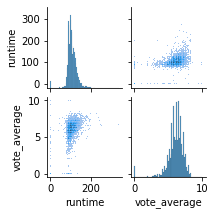

In [42]:
print(dataset['runtime'].corr(dataset['vote_average']))

corr_df = pd.DataFrame()
corr_df['runtime'] = dataset['runtime']
corr_df['vote_average'] = dataset['vote_average']
sns.pairplot(corr_df, height = 1.5, kind = 'hist')

In [43]:
"""
As we can see the correlation value is very low, as well as if we visualize the correlation between the two columns
we will fin that there is no any positive or negative correlation
"""

'\nAs we can see the correlation value is very low, as well as if we visualize the correlation between the two columns\nwe will fin that there is no any positive or negative correlation\n'

### Find the top 5 movies with the highest rate, and find if there anything common between them. ###



In [44]:
index = dataset['vote_average'].to_numpy().argsort()[::-1]
high_rate_df = pd.DataFrame() 
for i in range(0, 5):
    print(dataset.loc[index[i]]['title'])
    high_rate_df = high_rate_df.append(dataset.loc[index[i]])



Little Big Top
Me You and Five Bucks
Dancer, Texas Pop. 81
Stiff Upper Lips
Sardaarji


In [45]:
high_rate_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4662,0.0,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.missionimpossible.com/,40963.0,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0.0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,Based on a true story.,Little Big Top,10.0,1.0
4247,1.0,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",http://www.missionimpossible.com/,361505.0,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0.0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2.0
4045,0.0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.missionimpossible.com/,78373.0,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592.0,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1.0
3519,0.0,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.missionimpossible.com/,89861.0,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0.0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,Stiff Upper Lips,10.0,1.0
3992,0.0,[],http://www.missionimpossible.com/,346081.0,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,[],"[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2015-06-26,0.0,0.0,[],Released,Based on a true story.,Sardaarji,9.5,2.0


In [46]:
import matplotlib.pyplot as plt

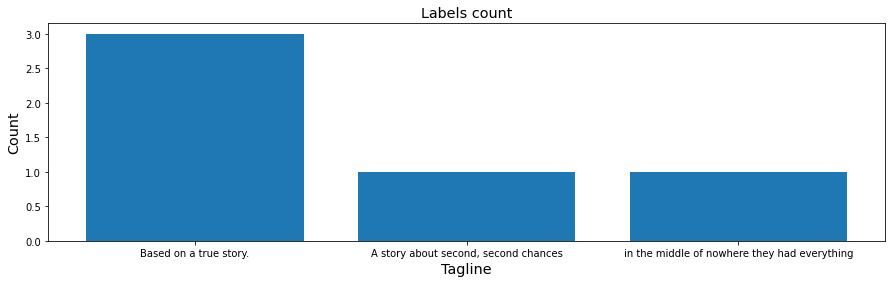

In [47]:
fig, ax = plt.subplots(figsize=(15, 4))
plt.bar(high_rate_df['tagline'].unique(), high_rate_df['tagline'].value_counts())
plt.title('Labels count', fontsize = 'x-large')
plt.ylabel('Count', fontsize = 'x-large')
plt.xlabel('Tagline', fontsize = 'x-large')
plt.show()

In [48]:
#json.loads(high_rate_df['genres'][0])
genres_corr = list()
for j in range(len(high_rate_df)):
    z = json.loads(high_rate_df['genres'].iloc[j])
    for i in range(len(z)):
        x = z[i]
        genres_corr.append(z[i]['name'])
temp_df = pd.DataFrame(genres_corr)

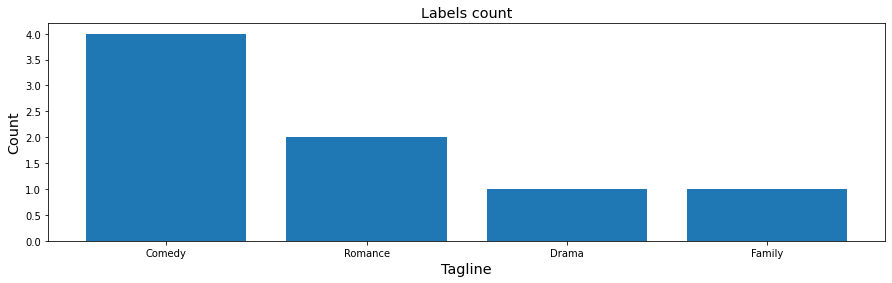

In [49]:
fig, ax = plt.subplots(figsize=(15, 4))
plt.bar(temp_df[0].unique(), temp_df.value_counts())
plt.title('Labels count', fontsize = 'x-large')
plt.ylabel('Count', fontsize = 'x-large')
plt.xlabel('Tagline', fontsize = 'x-large')
plt.show()

In [50]:
"""
It appears that there are 3 of the 5 movies depends on a true stroy, 4 of them have a comedy genre and 2 have romance.
So, it seems that the audience prefer the true stories that envolve Comedy and Romantic stories.
"""

'\nIt appears that there are 3 of the 5 movies depends on a true stroy, 4 of them have a comedy genre and 2 have romance.\nSo, it seems that the audience prefer the true stories that envolve Comedy and Romantic stories.\n'

### Find the most unsuccessful movie along time in terms of revenue - budget ###



In [51]:
x = dataset.sort_values(by = ['revenue', 'budget'], ascending = True, ignore_index = True )
x['title'][0]

'The Cat in the Hat'

### Rearange the dataframe based on vote_average column values ###



In [52]:
dataset.sort_values(by = ['vote_average'], ascending = True)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4633,0,[],http://www.missionimpossible.com/,300327,[],en,Death Calls,An action-packed love story on the Mexican bor...,0.005883,[],[],2010-09-01,0,0.0,[],Released,Based on a true story.,Death Calls,0.0,0
4305,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10402, ""...",http://www.missionimpossible.com/,114065,[],en,Down & Out With The Dolls,"The raunchy, spunky tale of the rise and fall ...",0.002386,[],[],2003-03-20,0,88.0,[],Released,Ain't Rock 'N' Roll a bitch.,Down & Out With The Dolls,0.0,0
4653,0,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,46252,[],en,Rust,"In the midst of a midlife crisis of faith, a m...",0.399491,[],[],2010-10-07,0,94.0,[],Released,Based on a true story.,Rust,0.0,0
4293,1,[],http://thealgerianmovie.com/,357834,[],en,The Algerian,The Algerian is an international political thr...,0.025364,"[{""name"": ""Zelko Films"", ""id"": 62451}]","[{""iso_3166_1"": ""DZ"", ""name"": ""Algeria""}, {""is...",2015-08-07,0,99.0,[],Released,Based on a true story.,The Algerian,0.0,0
4118,0,[],http://www.missionimpossible.com/,325140,[],en,Hum To Mohabbat Karega,"Raju, a waiter, is in love with the famous TV ...",0.001186,[],[],2000-05-26,0,0.0,[],Released,Based on a true story.,Hum To Mohabbat Karega,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,0,[],http://www.missionimpossible.com/,346081,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,[],"[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2015-06-26,0,0.0,[],Released,Based on a true story.,Sardaarji,9.5,2
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.missionimpossible.com/,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.missionimpossible.com/,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",http://www.missionimpossible.com/,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2


### Rearange the dataframe based on runtime column values ###



In [53]:
dataset.sort_values(by = ['runtime'], ascending = True)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4620,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.missionimpossible.com/,47534,"[{""id"": 2792, ""name"": ""boxer""}, {""id"": 4076, ""...",en,Fighting Tommy Riley,"An aging trainer and a young fighter, both in ...",0.045429,[],[],2005-05-06,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,Fighting Tommy Riley,5.3,4
4658,0,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",http://www.missionimpossible.com/,150211,"[{""id"": 177972, ""name"": ""bickering""}, {""id"": 2...",en,The Frozen,"After a harrowing snowmobile accident, a young...",1.084387,[],[],2012-10-10,0,0.0,[],Released,Based on a true story.,The Frozen,4.2,14
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3809,4000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://www.missionimpossible.com/,158150,[],en,How to Fall in Love,"An accountant, who never quite grew out of his...",1.923514,"[{""name"": ""Annuit Coeptis Entertainment Inc."",...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-21,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,How to Fall in Love,5.2,20
3112,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://www.missionimpossible.com/,41894,[],en,Blood Done Sign My Name,A drama based on the true story in which a bla...,0.397341,[],[],2010-02-01,0,0.0,[],Released,No one changes the world alone.,Blood Done Sign My Name,6.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,0,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,10549,"[{""id"": 456, ""name"": ""mother""}, {""id"": 497, ""n...",en,Hamlet,"Hamlet, Prince of Denmark, returns home to fin...",9.814785,"[{""name"": ""Castle Rock Entertainment"", ""id"": 9...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1996-12-25,0,242.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,Hamlet,7.3,117
1125,31115000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.missionimpossible.com/,8095,"[{""id"": 5049, ""name"": ""ancient rome""}, {""id"": ...",en,Cleopatra,Historical epic. The triumphs and tragedy of t...,13.244365,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1963-06-12,71000000,248.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The motion picture the world has been waiting ...,Cleopatra,6.7,146
1922,0,"[{""id"": 10752, ""name"": ""War""}, {""id"": 18, ""nam...",http://www.missionimpossible.com/,10655,"[{""id"": 393, ""name"": ""civil war""}, {""id"": 4097...",en,Gettysburg,Summer 1863. The Confederacy pushes north into...,5.529035,"[{""name"": ""TriStar Television"", ""id"": 8609}, {...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1993-10-08,25000000,254.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,Gettysburg,6.6,90
2631,0,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,112430,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Company,Real-life figures from the Cold War era mix wi...,1.485324,[],[],2007-08-05,0,276.0,[],Released,Based on a true story.,The Company,7.0,12


### Find the top 5 successful years for the USA cinema based on the total income devided by number of movies  ###



In [54]:
top_year_df = year_df.copy()
top_year_df['revenue'] = dataset['revenue']
top_year_df['budget'] = dataset['budget']
x = top_year_df.groupby('year', as_index=False)['revenue','budget'].sum()
x['income'] = x['revenue'] - x['budget']
x = x.sort_values(by = ['revenue','budget'], ascending = False)
x.iloc[:5]

,year,revenue,budget,income
84,2012.0,24141710246,7263782654,16877927592
86,2014.0,24120490589,7368453311,16752037278
85,2013.0,23411493295,8205880834,15205612461
87,2015.0,22775024221,6724547367,16050476854
81,2009.0,21072651506,7644466762,13428184744


### Find the most succesfull movie in [USA, UK] ###



In [55]:
## the most successful movie based on income
movie_df = top_year_df.copy()
movie_df['movie_name'] = dataset['title']
movie_df['rate'] = dataset['vote_average']
movie_df['income'] = movie_df['revenue'] - movie_df['budget']
desired_country = list()
for i in range(len(dataset)):
    temp = len(desired_country)
    z = json.loads(dataset['production_countries'][i])
    temp_country_ls = list()
    for j in range(len(z)):
        x = z[j]
        temp_country_ls.append(x['name'])
#         if x['name'] == 'United Kingdom' or x['name'] == 'United States':
#             desired_country.append(1)
#             break
    if 'United Kingdom' in temp_country_ls and 'United States of America' in temp_country_ls:
        desired_country.append(1)
    else: desired_country.append(0)

movie_df['Uk-Us'] = desired_country
x = movie_df.sort_values(by = ['income'], ascending = False)
x.iloc[:1]['movie_name']

0    Avatar
Name: movie_name, dtype: object

In [56]:
## the most successful movie based on rate
movie_df = top_year_df.copy()
movie_df['movie_name'] = dataset['title']
movie_df['rate'] = dataset['vote_average']
movie_df['income'] = movie_df['revenue'] - movie_df['budget']
desired_country = list()
for i in range(len(dataset)):
    temp = len(desired_country)
    z = json.loads(dataset['production_countries'][i])
    temp_country_ls = list()
    for j in range(len(z)):
        x = z[j]
        temp_country_ls.append(x['name'])
#         if x['name'] == 'United Kingdom' or x['name'] == 'United States':
#             desired_country.append(1)
#             break
    if 'United Kingdom' in temp_country_ls and 'United States of America' in temp_country_ls:
        desired_country.append(1)
    else: desired_country.append(0)

movie_df['Uk-Us'] = desired_country
x = movie_df.sort_values(by = ['rate'], ascending = False)
# x.iloc[:1]['movie_name']

### In your opinion what is the highest variable that affects the revenue value (high coloration) ### PONUS



<AxesSubplot:>

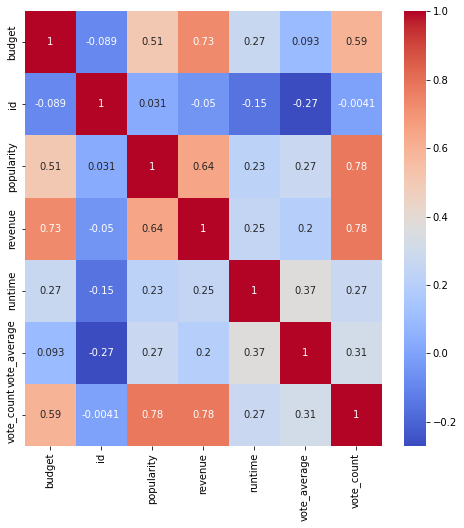

In [57]:
plt.figure(figsize=(8,8))
sns.heatmap(dataset.corr(), annot = True, cmap = 'coolwarm')

In [58]:
"""
As the correlation map implies. there are two variables affect the revenue ("vote_count", "budget").
I beleive that as the budget increase the more likely the movie become better and have more population 
may be due to more puplication. and that cause more votes.
"""

'\nAs the correlation map implies. there are two variables affect the revenue ("vote_count", "budget").\nI beleive that as the budget increase the more likely the movie become better and have more population \nmay be due to more puplication. and that cause more votes.\n'

## Good Luck